In [1]:
#import thu vien
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.
, horizontal_flip = True)
train_data = '/content/drive/MyDrive/fruits_classification/train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/fruits_classification/test'

In [8]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150),batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [9]:
train_dataset.class_indices

{'Cam': 0,
 'Dau_tay': 1,
 'Duahau': 2,
 'Khom': 3,
 'Man': 4,
 'Oi': 5,
 'Sau_rieng': 6,
 'Xoai': 7,
 'kiwi': 8,
 'tao': 9}

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [12]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
history = model.fit(train_dataset,batch_size=32,epochs=65,verbose=1,validation_data=validation_dataset)

Epoch 1/65
10/10 [==============================] - 1s 112ms/step - loss: 0.5436 - accuracy: 0.8500 - val_loss: 0.2889 - val_accuracy: 0.9200
Epoch 2/65
10/10 [==============================] - 1s 111ms/step - loss: 0.3813 - accuracy: 0.8600 - val_loss: 0.2626 - val_accuracy: 0.9300
Epoch 3/65
10/10 [==============================] - 1s 112ms/step - loss: 0.2728 - accuracy: 0.9200 - val_loss: 0.1209 - val_accuracy: 0.9800
Epoch 4/65
10/10 [==============================] - 1s 110ms/step - loss: 0.1389 - accuracy: 0.9500 - val_loss: 0.0751 - val_accuracy: 0.9800
Epoch 5/65
10/10 [==============================] - 1s 111ms/step - loss: 0.2254 - accuracy: 0.9300 - val_loss: 0.3438 - val_accuracy: 0.8900
Epoch 6/65
10/10 [==============================] - 1s 109ms/step - loss: 0.3256 - accuracy: 0.8800 - val_loss: 0.4617 - val_accuracy: 0.8300
Epoch 7/65
10/10 [==============================] - 1s 108ms/step - loss: 0.4859 - accuracy: 0.8500 - val_loss: 0.7962 - val_accuracy: 0.7000
Epoch 

In [15]:
model.save('/content/drive/MyDrive/fruits_classification/fruits_classification.h5')

In [16]:
fruitsclassification_model = load_model('/content/drive/MyDrive/fruits_classification/fruits_classification.h5')

In [17]:
score=fruitsclassification_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

10/10 [==============================] - 0s 28ms/step - loss: 1.8047e-04 - accuracy: 1.0000
Test loss =  0.00018046743934974074
Test accuracy =  1.0


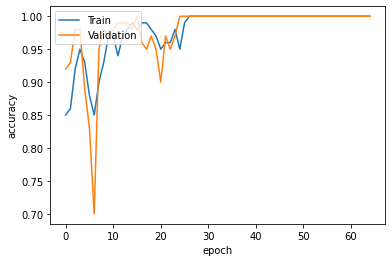

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

đây là trái:  Duahau


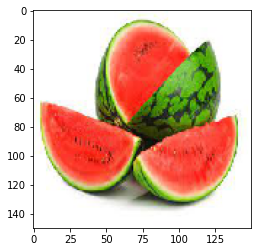

In [19]:
img = load_img('/content/drive/MyDrive/fruits_classification/Predict/1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Cam',
 'Dau_tay',
 'Duahau',
 'Khom',
 'Man',
 'Oi',
 'Sau_rieng',
 'Xoai',
 'kiwi',
 'tao']
print('đây là trái: ',Label[int(np.argmax(fruitsclassification_model.predict(img),axis=-1))])

đây là trái:  kiwi


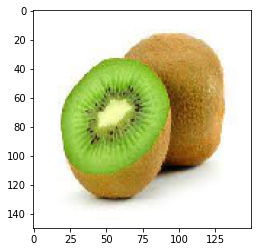

In [20]:
img = load_img('/content/drive/MyDrive/fruits_classification/Predict/2.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Cam',
 'Dau_tay',
 'Duahau',
 'Khom',
 'Man',
 'Oi',
 'Sau_rieng',
 'Xoai',
 'kiwi',
 'tao']
print('đây là trái: ',Label[int(np.argmax(fruitsclassification_model.predict(img),axis=-1))])

đây là trái:  tao


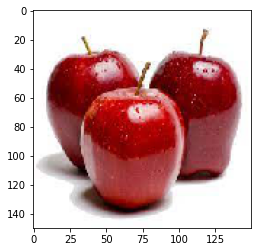

In [21]:
img = load_img('/content/drive/MyDrive/fruits_classification/Predict/4.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Cam',
 'Dau_tay',
 'Duahau',
 'Khom',
 'Man',
 'Oi',
 'Sau_rieng',
 'Xoai',
 'kiwi',
 'tao']
print('đây là trái: ',Label[int(np.argmax(fruitsclassification_model.predict(img),axis=-1))])

In [22]:
from google.colab import drive
drive.mount('/content/drive') 
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('fruits_classification.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-24 17:03:06--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-24 17:03:06 (39.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/fruits_classification.ipynb to pdf
[NbConvertApp] Support files will be in fruits_classification_files/
[NbConvertApp] Making directory ./fruits_classification_files
[NbConvertA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'